In [1]:
USE_MP = False
import silq
silq.initialize('OF27')

%matplotlib notebook

Initializing imports
Initializing functions
Initializing instruments
Initializing layout
Initializing data
Initializing parameters


Initializing plotting
Initialization complete


# DC scan

In [20]:
gate = PL[-0.8:-0.9:-0.001]

<IPython.core.display.Javascript object>


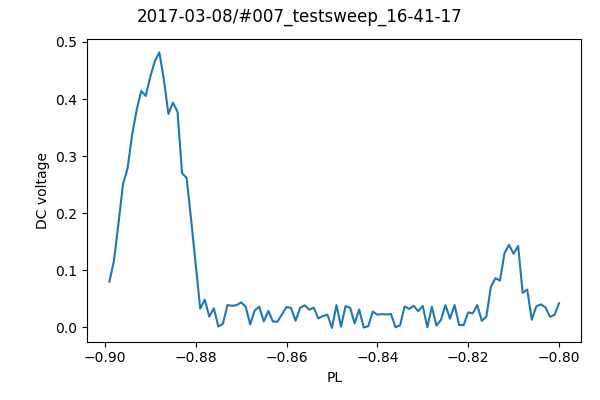

DataSet:
data = qc.load_data('2017-03-08/#007_testsweep_16-41-17')
   mode = DataMode.LOCAL
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | PL_set     | PL           | (100,)
   Measured | DC_voltage | DC_voltage   | (100,)
started at 2017-03-08 16:41:35


In [21]:
DC_parameter.setup()
loop = qc.Loop(gate).each(
    DC_parameter).then(
    qc.Task(layout.stop))#.run(
#     name='DC_{}_scan'.format(gate.name),
#                                 progress_interval=True)
data = loop.get_data_set(name='testsweep')

plot = qc.MatPlot()
plot.add(data.DC_voltage)
_ = loop.with_bg_task(plot.update).run()

PL(gate[0])

# EPR scan

In [18]:
find_high_low = silq.analysis.analysis.find_high_low

In [6]:
layout.start()

In [22]:
layout.stop()

In [9]:
EPR_parameter.setup()
EPR_parameter.single_settings(silent=False, samples=100)
%time vals = EPR_parameter()

contrast: 0.117
dark_counts: 0.540
voltage_difference: 0.326
fidelity_empty: 0.000
fidelity_load: 0.000
Wall time: 2.05 s


In [5]:
EPR_parameter.pulse_sequence

PulseSequence with 4 pulses, duration: 9.0
	DCPulse(empty, A=-0.01, t_start=0, t_stop=1.5)
	DCPulse(plunge, A=0.01, t_start=1.5, t_stop=3.0)
	DCPulse(read (long), A=0, t_start=3.0, t_stop=8.0)
	DCPulse(final, A=0, t_start=8.0, t_stop=9.0)

<IPython.core.display.Javascript object>


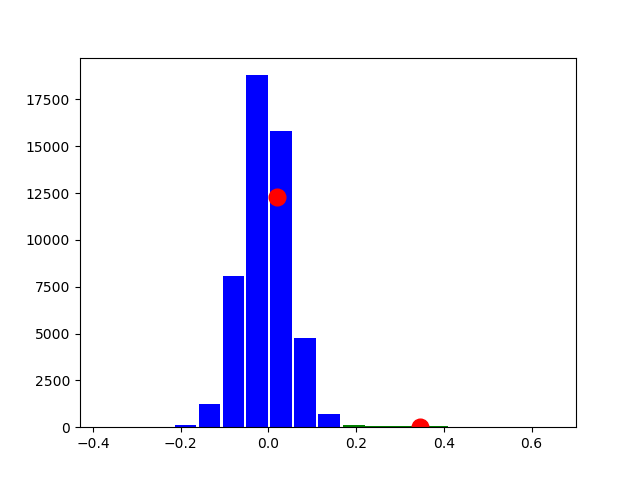

In [10]:
find_high_low(EPR_parameter.trace_segments['output']['read'],
             plot=True);

<IPython.core.display.Javascript object>


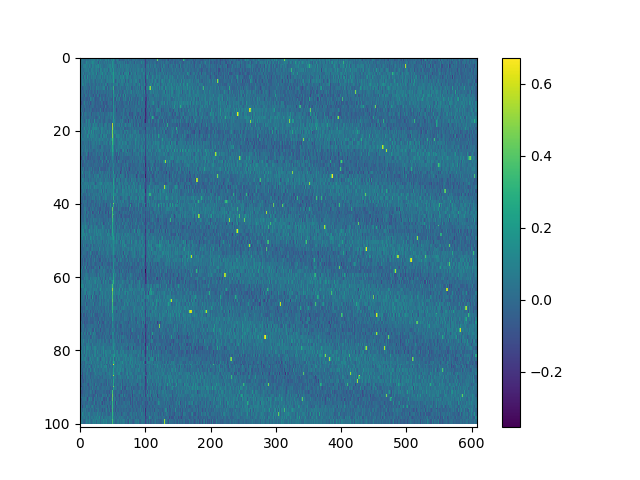

In [13]:
plot_traces(EPR_parameter.data['acquisition_traces']['output'])

In [5]:
DF(0.78125)

In [2]:
gate1 = PL[-0.78:-0.82:-0.004]
gate2 = PL[-0.76:-0.8:-0.004]
print(len(gate1), len(gate1))
EPR_parameter.samples = 50
loop = qc.Loop(gate1).loop(
    gate2).each(
        EPR_parameter)
data = loop.get_data_set(name='calibration')

10 10


<IPython.core.display.Javascript object>


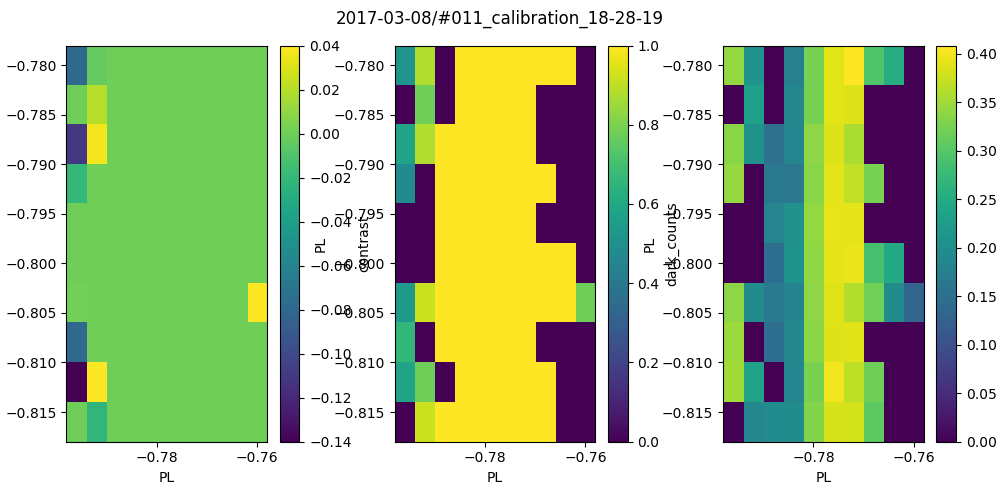

No peaks found
No peaks found


No peaks found
No peaks found
DataSet:
data = qc.load_data('2017-03-08/#011_calibration_18-28-19')
   mode = DataMode.LOCAL
   <Type>   | <array_id>         | <array.name>       | <array.shape>
   Setpoint | PL_set             | PL                 | (10,)
   Setpoint | PL_set_0           | PL                 | (10, 10)
   Measured | contrast           | contrast           | (10, 10)
   Measured | dark_counts        | dark_counts        | (10, 10)
   Measured | voltage_difference | voltage_difference | (10, 10)
   Measured | fidelity_empty     | fidelity_empty     | (10, 10)
   Measured | fidelity_load      | fidelity_load      | (10, 10)
started at 2017-03-08 18:31:58


In [3]:
plot = qc.MatPlot(subplots=(1,3), figsize=(10,4))
plot[0].add(data.contrast)
plot[1].add(data.dark_counts)
plot[2].add(data.voltage_difference)
_ = loop.with_bg_task(plot.update).run()

In [28]:
properties_config

{'readout_threshold_voltage': 0.2, 't_read': 1.5, 't_skip': 0.05}

In [29]:
EPR_parameter.t_read

1.5

In [7]:
EPR_parameter()

[0, 0, 0, 0, 0]

In [12]:
ax = plt.gca()
ax.

In [ ]:
cax.set_clim

In [19]:
find_high_low(EPR_parameter.trace_segments['output']['read'])

{'high': {'mean': 0.056529009908922581,
  'std': 0.05265993487603747,
  'traces': array([ 0.1  ,  0.038,  0.061, ...,  0.057,  0.079,  0.08 ])},
 'low': {'mean': -0.031237876533127783,
  'std': 0.029878333011572476,
  'traces': array([-0.081, -0.067, -0.003, ..., -0.009, -0.081, -0.014])},
 'threshold_voltage': None,
 'voltage_difference': 0.087766886442050357}

In [26]:
variable_read_parameter.setup()
layout.start()

In [24]:
layout.stop()

<IPython.core.display.Javascript object>


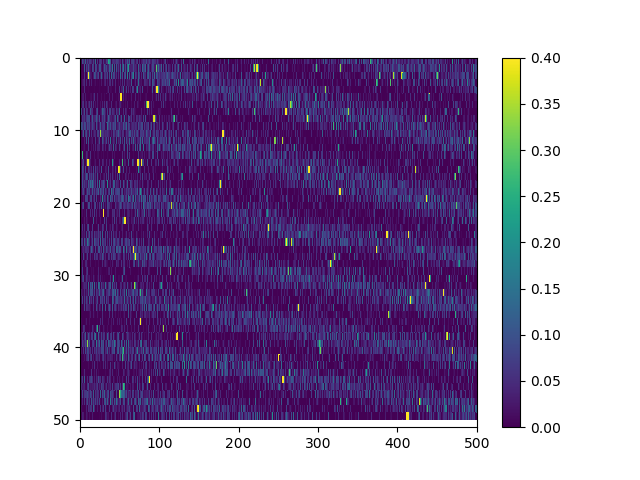

In [21]:
ax, cax = plot_traces(EPR_parameter.trace_segments['output']['read'])
cax.set_clim(0, 0.4)

<IPython.core.display.Javascript object>


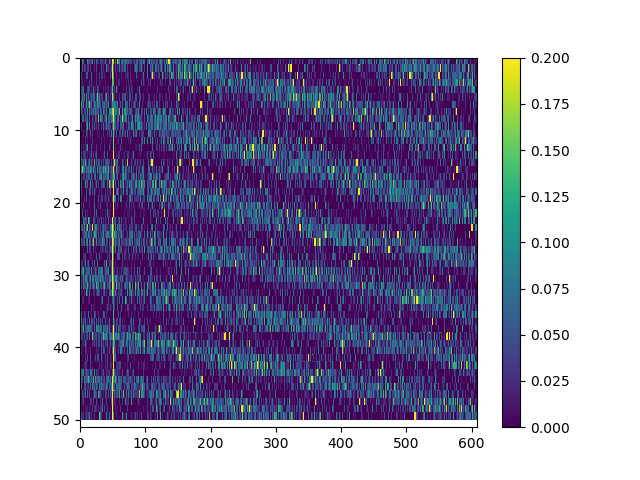

In [16]:
ax, cax = plot_traces(EPR_parameter.data['acquisition_traces']['output'])
cax.set_clim(0, 0.2)

# Variable read

In [79]:
variable_read_parameter(0)
variable_read_parameter.setup()

In [80]:
layout.start()

In [81]:
layout.stop()

<IPython.core.display.Javascript object>


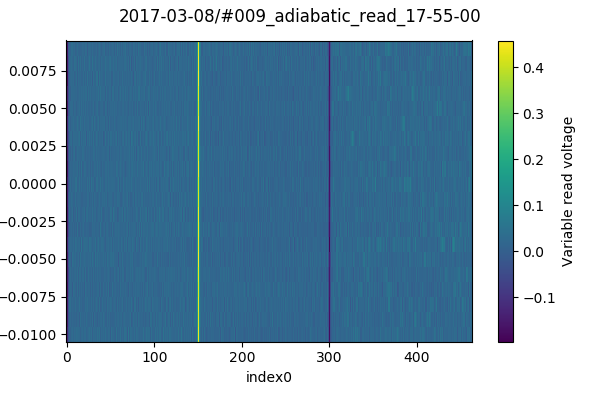

DataSet:
data = qc.load_data('2017-03-08/#009_adiabatic_read_17-55-00')
   mode = DataMode.LOCAL
   <Type>   | <array_id>                | <array.name>          | <array.shape>
   Setpoint | variable_read_voltage_set | variable_read_voltage | (20,)
   Measured | variable_read_voltage     | variable_read_voltage | (20, 464)
started at 2017-03-08 17:55:32


In [71]:
loop = qc.Loop(variable_read_parameter[-0.01:0.01:0.001]).each(
    variable_read_parameter)
data = loop.get_data_set(name='adiabatic_read')

plot = qc.MatPlot()
plot.add(data.variable_read_voltage)
_ = loop.with_bg_task(plot.update).run()

In [70]:
len(variable_read_parameter[-0.01:0.001:0.01])

2